In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [2]:
fraud_data=pd.read_csv("D:/data_structure/random_forest/Fraud_check.csv")
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data.shape

(600, 6)

In [4]:
fraud_data.loc[fraud_data['Taxable.Income']>30000, 'Income']='Good'
fraud_data.loc[fraud_data['Taxable.Income']<=30000, 'Income']='Risky'

In [5]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [6]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Income           600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [8]:
fraud_data1=fraud_data.rename(columns={'Marital.Status':'marital_status','Taxable.Income':'Taxable_income','City.Population':'City_populatoin','Work.Experience':'Work_experience'})
fraud_data1

,Undergrad,marital_status,Taxable_income,City_populatoin,Work_experience,Urban,Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


# Converting catogorical data into numeric Using Labelencoder

In [9]:
labelencoder=LabelEncoder()
fraud_data1['Undergrad']=labelencoder.fit_transform(fraud_data1['Undergrad'])
fraud_data1['marital_status']=labelencoder.fit_transform(fraud_data1['marital_status'])
fraud_data1['Urban']=labelencoder.fit_transform(fraud_data1['Urban'])

In [10]:
fraud_data1

,Undergrad,marital_status,Taxable_income,City_populatoin,Work_experience,Urban,Income
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


<AxesSubplot:ylabel='Count'>

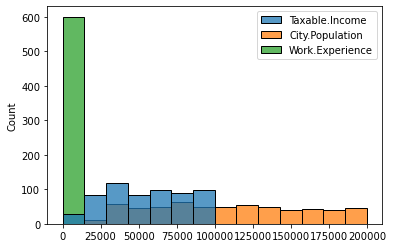

In [11]:
sns.histplot(fraud_data)

<AxesSubplot:>

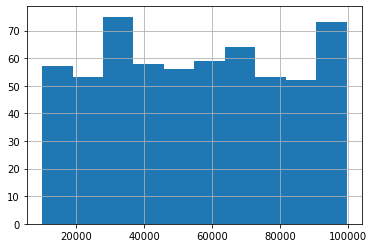

In [12]:
fraud_data1['Taxable_income'].hist()

# Splitting the data into train and test parts

In [13]:
x= fraud_data1.iloc[:,0:-1]
x

,Undergrad,marital_status,Taxable_income,City_populatoin,Work_experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [14]:
y=fraud_data1['Income']
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Income, Length: 600, dtype: object

In [15]:
y.value_counts()

Good     476
Risky    124
Name: Income, dtype: int64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
x_train.shape,y_train.shape

((480, 6), (480,))

In [18]:
x_test.shape,y_test.shape

((120, 6), (120,))

# Model Building

In [19]:
from sklearn.model_selection import KFold,cross_val_score

In [20]:
#Random forest Using KFold,Cross_val_score
num_trees = 100
max_features = 4
kfold = KFold(n_splits=20,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results_rfc = cross_val_score(model, x, y, cv=kfold)
print(results_rfc.mean()*100)

99.83333333333334


In [21]:
classifier=RandomForestClassifier(n_estimators=50)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [22]:
#predicting the model
y_test_pred= classifier.predict(x_test)
y_train_pred=classifier.predict(x_train)

In [23]:
accuracy_score(y_test_pred,y_test)

1.0

In [24]:
accuracy_score(y_train_pred,y_train)

1.0

In [25]:
result1 = classification_report(y_test,y_test_pred)
print('Classification Report:')
print(result1)
result2= accuracy_score(y_test,y_test_pred)
print('Accuarcy Score:')
print(result2)

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        88
       Risky       1.00      1.00      1.00        32

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuarcy Score:
1.0


In [26]:
pd.crosstab(y_test,y_test_pred)

col_0,Good,Risky
Income,,
Good,88,0
Risky,0,32


# inference:
The accuracy of both training Data and testing data is 100% As we can see my model has not done any misclassifications from crosstab!